In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:/Users/srbol/OneDrive/Desktop/Binus/Semester 4/SSM/UAS/DataAfter.csv")
print(df)

             Timestamp       Jurusan Jenis Kelamin  \
0    5/29/2024 0:44:22  Data Science     Laki-laki   
1    5/29/2024 5:26:09  Data Science     Laki-laki   
2    5/29/2024 5:42:02  Data Science     Perempuan   
3   5/29/2024 10:58:08  Data Science     Laki-laki   
4   5/29/2024 11:45:50  Data Science     Laki-laki   
..                 ...           ...           ...   
57  6/18/2024 22:25:22    Management     Laki-laki   
58  6/18/2024 22:25:56    Management     Laki-laki   
59  6/18/2024 22:26:39    Management     Perempuan   
60  6/18/2024 22:27:31    Management     Perempuan   
61   6/19/2024 5:47:06    Management     Laki-laki   

   1. Apakah anda pernah merokok?  \
0                          Pernah   
1                          Pernah   
2                    Tidak pernah   
3                    Tidak pernah   
4                          Pernah   
..                            ...   
57                         Pernah   
58                         Pernah   
59                

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Timestamp                                                                       62 non-null     object
 1   Jurusan                                                                         62 non-null     object
 2   Jenis Kelamin                                                                   62 non-null     object
 3   1. Apakah anda pernah merokok?                                                  62 non-null     object
 4   2. Apakah anda merupakan seorang perokok aktif?                                 62 non-null     object
 5   3. Berapa lama anda telah merokok?                                              62 non-null     object
 6   4. Dampak apa yang dirasakan

In [3]:
df.rename(columns={
    'Timestamp': 'Timestamp',
    'Jurusan': 'Jurusan',
    'Jenis Kelamin': 'Gender',
    '1. Apakah anda pernah merokok?': 'Pernah',
    '2. Apakah anda merupakan seorang perokok aktif?': 'Aktif',
    '3. Berapa lama anda telah merokok?': 'Lama_Merokok',
    '4. Dampak apa yang dirasakan dari merokok ? (pilih 3)': 'Dampak',
    '6. Frekuensi merokok': 'Frekuensi',
    '7. Pilih alasan yang paling relevan mengapa Anda merokok!': 'Alasan',
    '8. Apakah anda menyadari risiko kesehatan yang dapat diakibatkan dari merokok?': 'Risiko',
}, inplace=True)

In [4]:
df

,Timestamp,Jurusan,Gender,Pernah,Aktif,Lama_Merokok,Dampak,Frekuensi,Alasan,Risiko,Berhenti
0,5/29/2024 0:44:22,Data Science,Laki-laki,Pernah,Bukan,2 tahun,Pusing,1-5 batang per hari,Kesenangan,Ya,Ya
1,5/29/2024 5:26:09,Data Science,Laki-laki,Pernah,Bukan,1 tahun,asam lambung,1-5 batang per hari,Lingkungan,Ya,Ya
2,5/29/2024 5:42:02,Data Science,Perempuan,Tidak pernah,Bukan,0,0,NaN,NaN,NaN,NaN
3,5/29/2024 10:58:08,Data Science,Laki-laki,Tidak pernah,Bukan,0,0,NaN,NaN,NaN,NaN
4,5/29/2024 11:45:50,Data Science,Laki-laki,Pernah,Ya,diatas 2 tahun,Sesak nafas,1-5 batang per hari,Kesenangan,Ya,Ya
...,...,...,...,...,...,...,...,...,...,...,...
57,6/18/2024 22:25:22,Management,Laki-laki,Pernah,Ya,1 tahun,Batuk,1-5 batang per hari,Lingkungan,Ya,Tidak
58,6/18/2024 22:25:56,Management,Laki-laki,Pernah,Ya,diatas 2 tahun,Batuk,10-12 batang per hari,Lingkungan,Ya,Ya
59,6/18/2024 22:26:39,Management,Perempuan,Tidak pernah,Bukan,0,0,NaN,NaN,NaN,NaN
60,6/18/2024 22:27:31,Management,Perempuan,Pernah,Bukan,dibawah 1 tahun,Batuk,1-5 batang per hari,Lingkungan,Ya,Tidak


In [5]:
df = df.drop('Timestamp', axis = 1)

In [6]:
df.columns

Index(['Jurusan', 'Gender', 'Pernah', 'Aktif', 'Lama_Merokok', 'Dampak',
       'Frekuensi', 'Alasan', 'Risiko', 'Berhenti'],
      dtype='object')

In [7]:
df

,Jurusan,Gender,Pernah,Aktif,Lama_Merokok,Dampak,Frekuensi,Alasan,Risiko,Berhenti
0,Data Science,Laki-laki,Pernah,Bukan,2 tahun,Pusing,1-5 batang per hari,Kesenangan,Ya,Ya
1,Data Science,Laki-laki,Pernah,Bukan,1 tahun,asam lambung,1-5 batang per hari,Lingkungan,Ya,Ya
2,Data Science,Perempuan,Tidak pernah,Bukan,0,0,NaN,NaN,NaN,NaN
3,Data Science,Laki-laki,Tidak pernah,Bukan,0,0,NaN,NaN,NaN,NaN
4,Data Science,Laki-laki,Pernah,Ya,diatas 2 tahun,Sesak nafas,1-5 batang per hari,Kesenangan,Ya,Ya
...,...,...,...,...,...,...,...,...,...,...
57,Management,Laki-laki,Pernah,Ya,1 tahun,Batuk,1-5 batang per hari,Lingkungan,Ya,Tidak
58,Management,Laki-laki,Pernah,Ya,diatas 2 tahun,Batuk,10-12 batang per hari,Lingkungan,Ya,Ya
59,Management,Perempuan,Tidak pernah,Bukan,0,0,NaN,NaN,NaN,NaN
60,Management,Perempuan,Pernah,Bukan,dibawah 1 tahun,Batuk,1-5 batang per hari,Lingkungan,Ya,Tidak


In [8]:
print(df['Frekuensi'].isna().sum())
df['Frekuensi'] = df['Frekuensi'].fillna('0')

38


In [9]:
print(df['Frekuensi'].isna().sum())
df['Alasan'] = df['Alasan'].fillna('0')

0


In [10]:
print(df['Risiko'].isna().sum())
df['Risiko'] = df['Risiko'].fillna('0')

38


In [11]:
print(df['Berhenti'].isna().sum())
df['Berhenti'] = df['Berhenti'].fillna('0')


38


In [12]:
df.head()

,Jurusan,Gender,Pernah,Aktif,Lama_Merokok,Dampak,Frekuensi,Alasan,Risiko,Berhenti
0,Data Science,Laki-laki,Pernah,Bukan,2 tahun,Pusing,1-5 batang per hari,Kesenangan,Ya,Ya
1,Data Science,Laki-laki,Pernah,Bukan,1 tahun,asam lambung,1-5 batang per hari,Lingkungan,Ya,Ya
2,Data Science,Perempuan,Tidak pernah,Bukan,0,0,0,0,0,0
3,Data Science,Laki-laki,Tidak pernah,Bukan,0,0,0,0,0,0
4,Data Science,Laki-laki,Pernah,Ya,diatas 2 tahun,Sesak nafas,1-5 batang per hari,Kesenangan,Ya,Ya


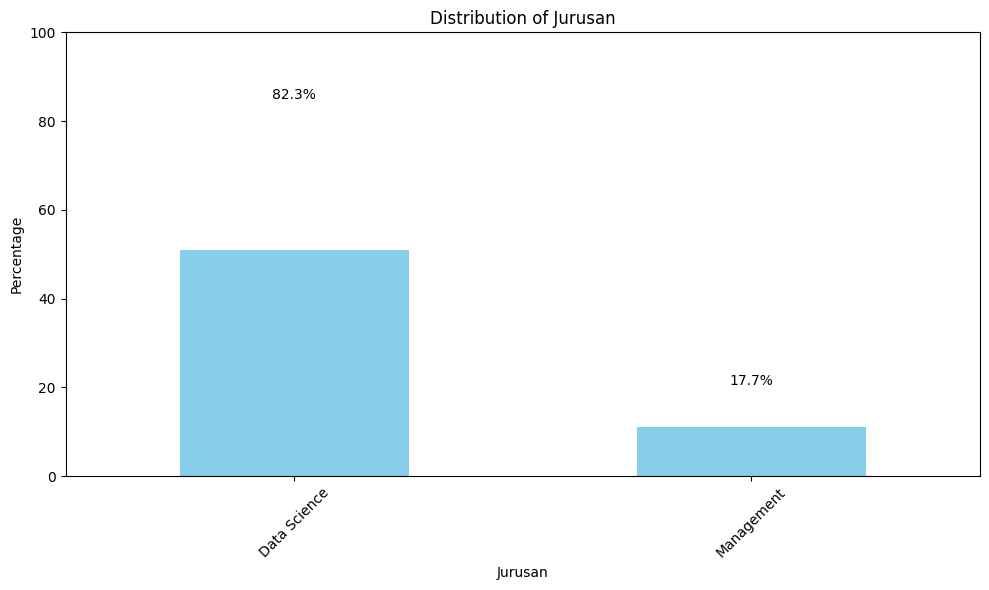

In [13]:
jurusan_counts = df['Jurusan'].value_counts()

# Calculate percentages
jurusan_percentages = jurusan_counts / jurusan_counts.sum() * 100
plt.figure(figsize=(10, 6))
bars = jurusan_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Jurusan')
plt.xlabel('Jurusan')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100) 
for i, v in enumerate(jurusan_percentages):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

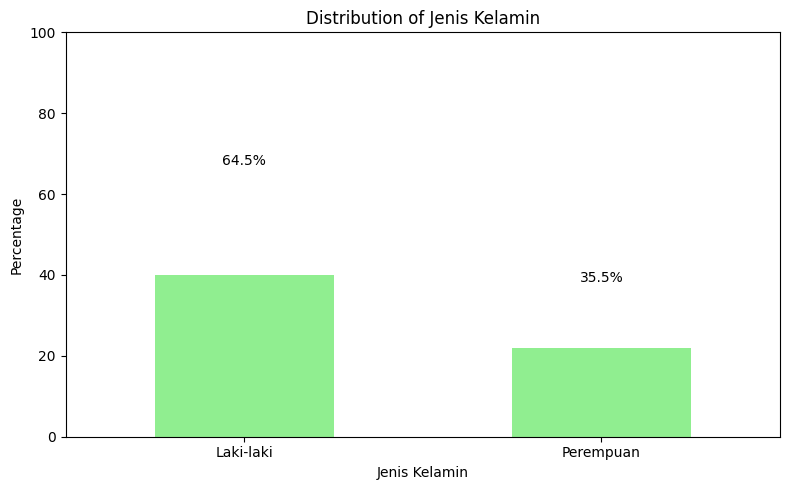

In [14]:
gender_counts = df['Gender'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100
plt.figure(figsize=(8, 5))
bars = gender_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100)
for i, v in enumerate(gender_percentages):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

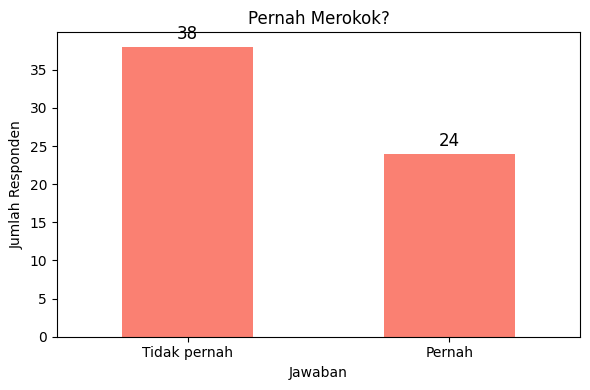

In [15]:
pernah_counts = df['Pernah'].value_counts()

plt.figure(figsize=(6, 4))
bars = pernah_counts.plot(kind='bar', color='salmon')
plt.title('Pernah Merokok?')
plt.xlabel('Jawaban')
plt.ylabel('Jumlah Responden')
for i, v in enumerate(pernah_counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

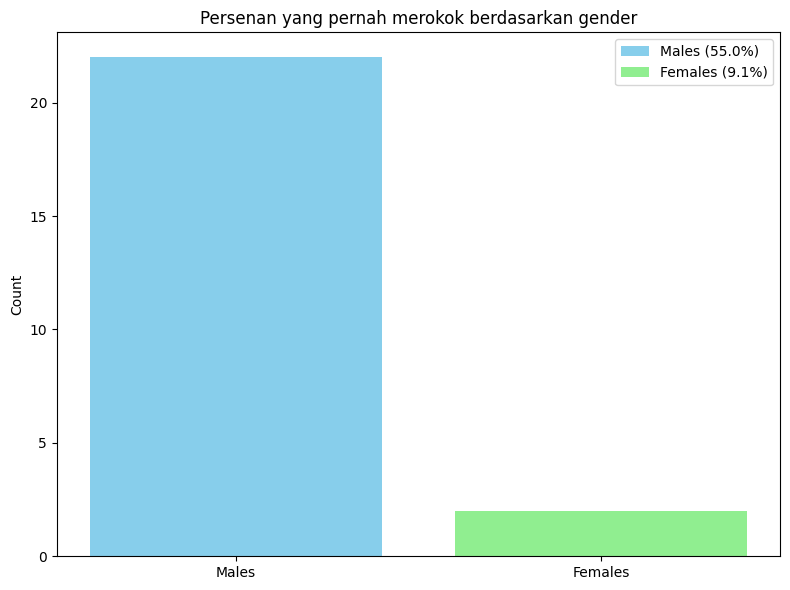

In [16]:
males_smokers = df[(df['Gender'] == 'Laki-laki') & (df['Pernah'] == 'Pernah')]
females_smokers = df[(df['Gender'] == 'Perempuan') & (df['Pernah'] == 'Pernah')]

num_males_smokers = males_smokers.shape[0]
num_females_smokers = females_smokers.shape[0]


total_males = df[df['Gender'] == 'Laki-laki'].shape[0]
total_females = df[df['Gender'] == 'Perempuan'].shape[0]

percent_males_smokers = (num_males_smokers / total_males) * 100
percent_females_smokers = (num_females_smokers / total_females) * 100

plt.figure(figsize=(8, 6))

plt.bar('Males', num_males_smokers, color='skyblue', label=f'Males ({percent_males_smokers:.1f}%)')

plt.bar('Females', num_females_smokers, color='lightgreen', label=f'Females ({percent_females_smokers:.1f}%)')

plt.title('Persenan yang pernah merokok berdasarkan gender')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

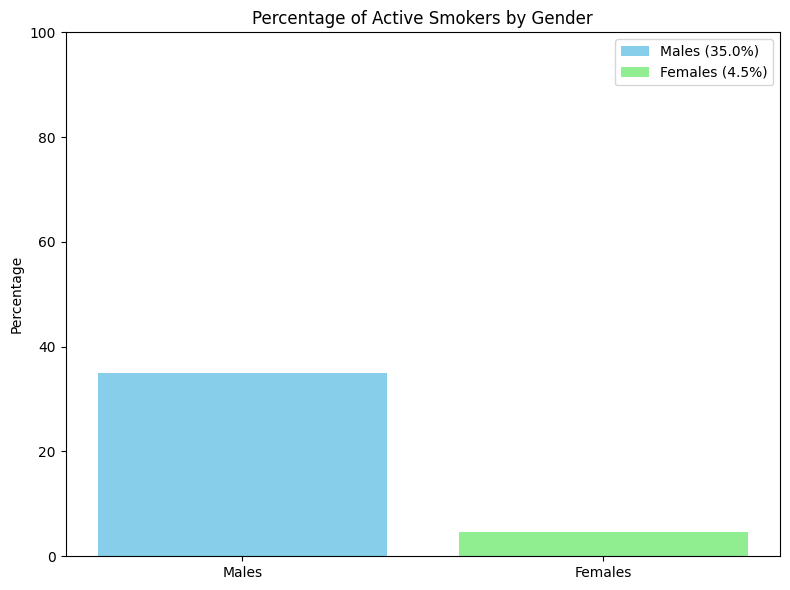

In [17]:
males_active_smokers = df[(df['Gender'] == 'Laki-laki') & (df['Aktif'] == 'Ya')]
females_active_smokers = df[(df['Gender'] == 'Perempuan') & (df['Aktif'] == 'Ya')]

total_males = df[df['Gender'] == 'Laki-laki'].shape[0]
total_females = df[df['Gender'] == 'Perempuan'].shape[0]

percent_males_active = (males_active_smokers.shape[0] / total_males) * 100
percent_females_active = (females_active_smokers.shape[0] / total_females) * 100

plt.figure(figsize=(8, 6))

plt.bar('Males', percent_males_active, color='skyblue', label=f'Males ({percent_males_active:.1f}%)')

plt.bar('Females', percent_females_active, color='lightgreen', label=f'Females ({percent_females_active:.1f}%)')

plt.title('Percentage of Active Smokers by Gender')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.legend()
plt.tight_layout()
plt.show()

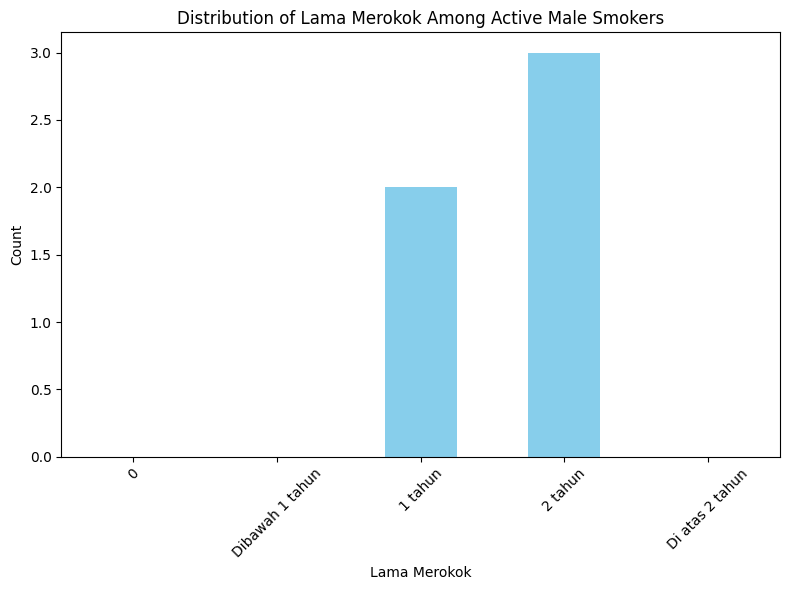

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame creation
bins = ['0', 'Dibawah 1 tahun', '1 tahun', '2 tahun', 'Di atas 2 tahun']

# Map the values in 'Lama_Merokok' column to the bins
df['Lama_Merokok'] = pd.Categorical(df['Lama_Merokok'], categories=bins, ordered=True)

# Filter data for active male smokers
active_male_smokers = df[(df['Gender'] == 'Laki-laki') & (df['Aktif'] == 'Ya')]

# Count the distribution of 'Lama_Merokok' for active male smokers
duration_counts = active_male_smokers['Lama_Merokok'].value_counts().reindex(bins)

# Plotting bar plot for distribution of 'Lama_Merokok' among active male smokers
plt.figure(figsize=(8, 6))
bars = duration_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Lama Merokok Among Active Male Smokers')
plt.xlabel('Lama Merokok')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


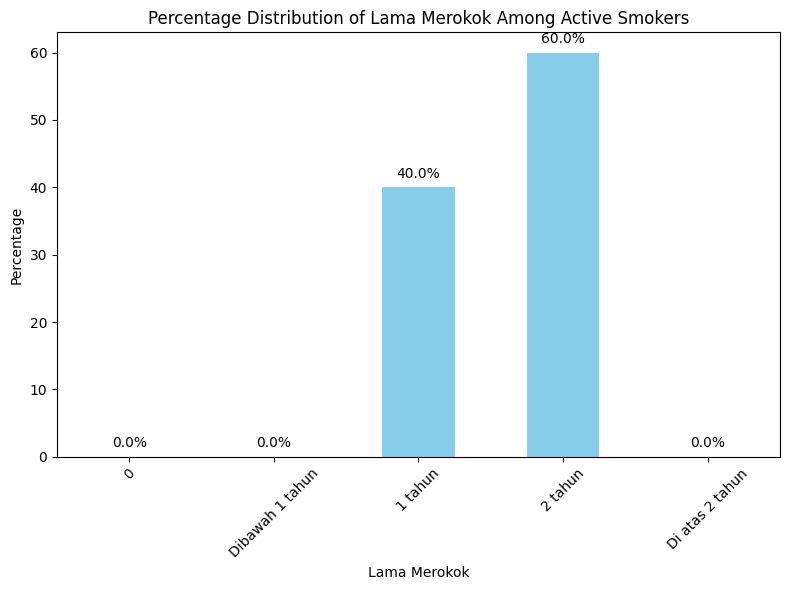

In [19]:
bins = ['0', 'Dibawah 1 tahun', '1 tahun', '2 tahun', 'Di atas 2 tahun']

df['Lama_Merokok'] = pd.Categorical(df['Lama_Merokok'], categories=bins, ordered=True)
active_smokers = df[df['Aktif'] == 'Ya']
duration_counts = active_smokers['Lama_Merokok'].value_counts().reindex(bins)

percentages = (duration_counts / duration_counts.sum()) * 100
plt.figure(figsize=(8, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Lama Merokok Among Active Smokers')
plt.xlabel('Lama Merokok')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()

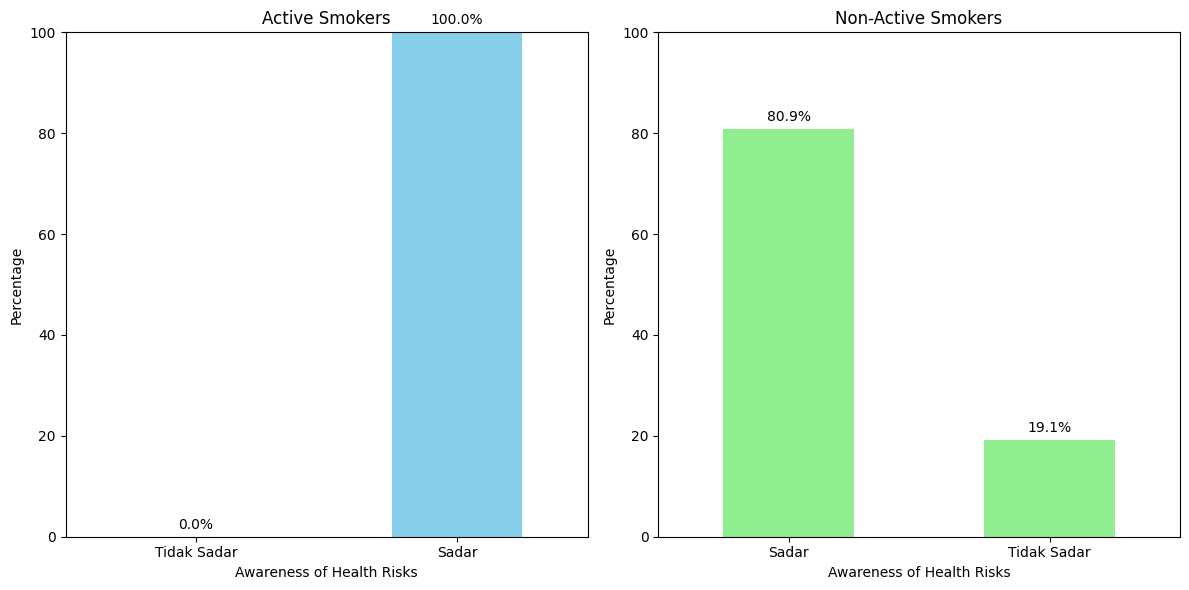

In [20]:
counts = df.groupby('Aktif')['Risiko'].value_counts().unstack().fillna(0)
total_active = counts.loc['Ya'].sum()
total_non_active = counts.loc['Bukan'].sum()

percent_active = (counts.loc['Ya'] / total_active) * 100
percent_non_active = (counts.loc['Bukan'] / total_non_active) * 100

# Plotting bar plot for percentage of individuals aware of health risks
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for active smokers
percent_active.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Active Smokers')
ax1.set_xlabel('Awareness of Health Risks')
ax1.set_ylabel('Percentage')
ax1.set_ylim(0, 100)
ax1.set_xticklabels(['Tidak Sadar', 'Sadar'], rotation=0)
for i, v in enumerate(percent_active):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Plot for non-active smokers
percent_non_active.plot(kind='bar', color='lightgreen', ax=ax2)
ax2.set_title('Non-Active Smokers')
ax2.set_xlabel('Awareness of Health Risks')
ax2.set_ylabel('Percentage')
ax2.set_ylim(0, 100)
ax2.set_xticklabels(['Sadar', 'Tidak Sadar'], rotation=0)
for i, v in enumerate(percent_non_active):
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

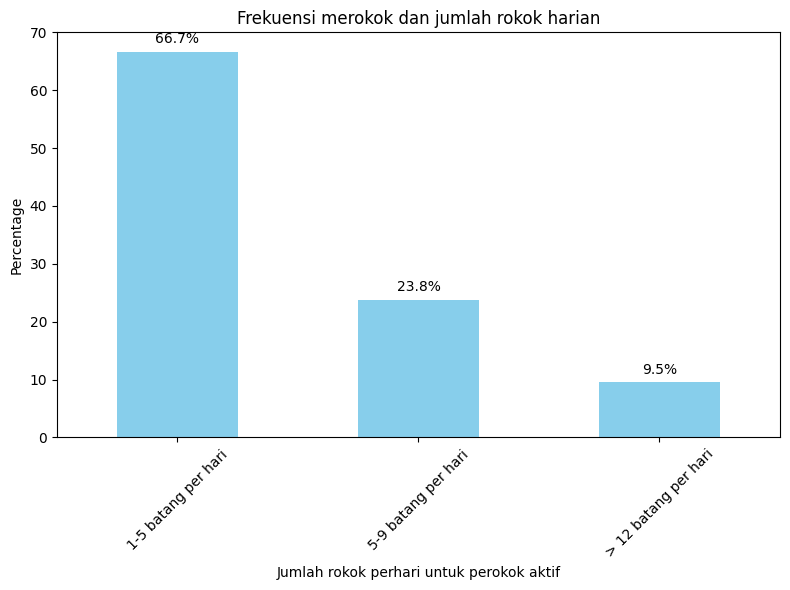

In [21]:
bins = ['1-5 batang per hari', '5-9 batang per hari', '> 12 batang per hari']

df['Frekuensi'] = pd.Categorical(df['Frekuensi'], categories=bins, ordered=True)
active_smokers = df[df['Pernah'] == 'Pernah']
duration_counts = active_smokers['Frekuensi'].value_counts().reindex(bins)

percentages = (duration_counts / duration_counts.sum()) * 100
plt.figure(figsize=(8, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Frekuensi merokok dan jumlah rokok harian')
plt.xlabel('Jumlah rokok perhari untuk perokok aktif')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()

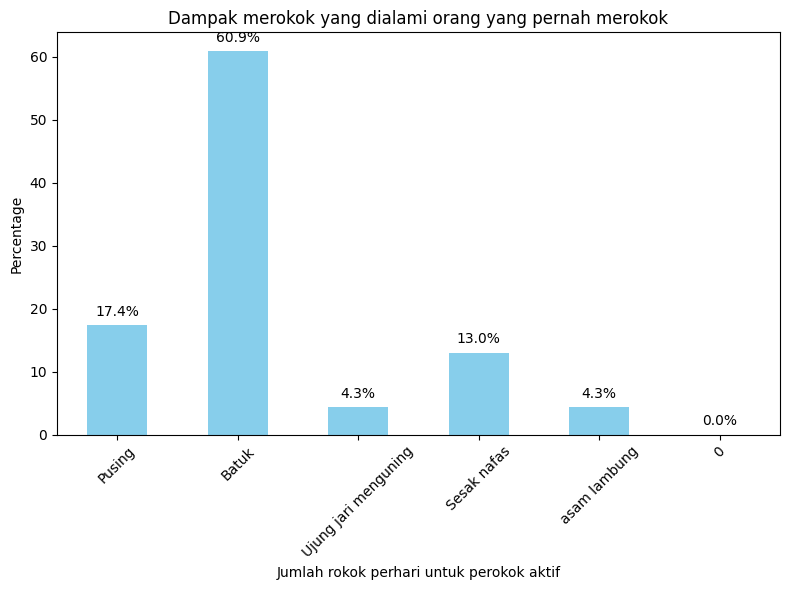

In [22]:
bins = ['Pusing', 'Batuk', 'Ujung jari menguning', 'Sesak nafas', 'asam lambung', '0']

df['Dampak'] = pd.Categorical(df['Dampak'], categories=bins, ordered=True)
active_smokers = df[df['Pernah'] == 'Pernah']
duration_counts = active_smokers['Dampak'].value_counts().reindex(bins)

percentages = (duration_counts / duration_counts.sum()) * 100
plt.figure(figsize=(8, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Dampak merokok yang dialami orang yang pernah merokok')
plt.xlabel('Jumlah rokok perhari untuk perokok aktif')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()

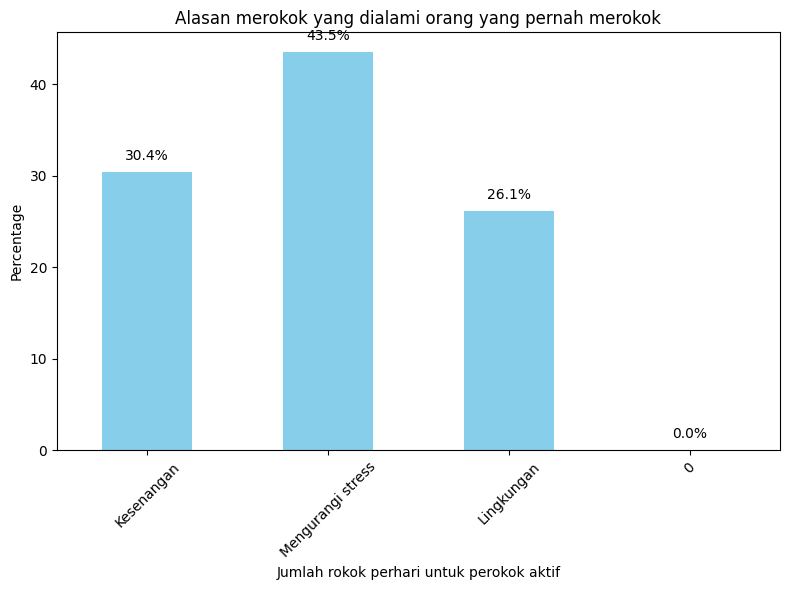

In [23]:
bins = ['Kesenangan', 'Mengurangi stress', 'Lingkungan', '0']

df['Alasan'] = pd.Categorical(df['Alasan'], categories=bins, ordered=True)
active_smokers = df[df['Pernah'] == 'Pernah']
duration_counts = active_smokers['Alasan'].value_counts().reindex(bins)

percentages = (duration_counts / duration_counts.sum()) * 100
plt.figure(figsize=(8, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Alasan merokok yang dialami orang yang pernah merokok')
plt.xlabel('Jumlah rokok perhari untuk perokok aktif')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()

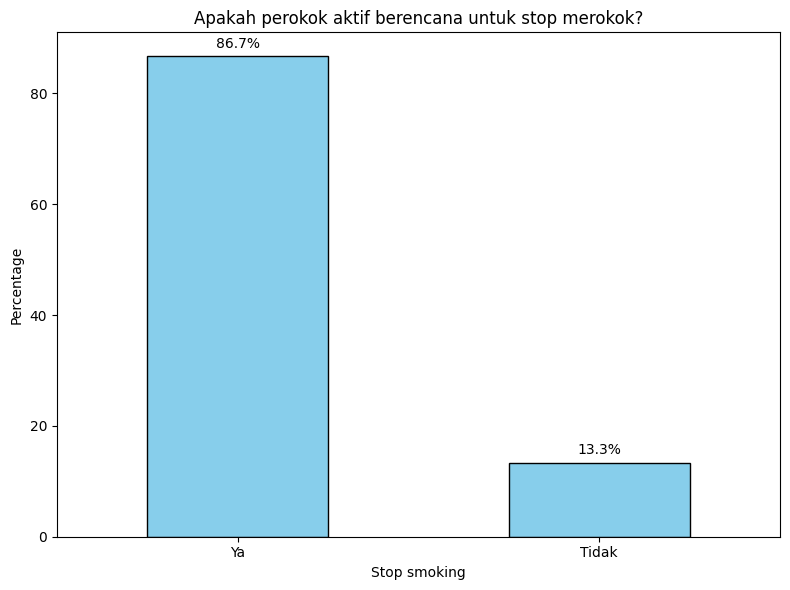

In [24]:

active_smokers = df[df['Aktif'] == 'Ya']
stop_counts = active_smokers['Berhenti'].value_counts()
percentages = (stop_counts / len(active_smokers)) * 100

plt.figure(figsize=(8, 6))
bars = percentages.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Apakah perokok aktif berencana untuk stop merokok?')
plt.xlabel('Stop smoking')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_data = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0)

In [28]:
from scipy.stats import zscore
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(encoded_data)
factor_loadings = fa.loadings_
print(f"Factor Loadings:\n{factor_loadings}")

Factor Loadings:
[[ 0.11515636 -0.028167    0.99057792]
 [-0.30930509 -0.34534448 -0.04934507]
 [-0.7045954  -0.70785269 -0.09017563]
 [ 0.71031976  0.26069265  0.16014504]
 [ 0.75578264  0.55870211  0.10087775]
 [ 0.29057543  0.76270376 -0.08432336]
 [-0.43521975 -0.75001255  0.01286726]
 [ 0.68742003  0.56357615 -0.00664545]
 [ 0.7045954   0.70785269  0.09017563]
 [ 0.71830538  0.66921763  0.02858503]]


In [31]:
z_scores = np.abs(zscore(encoded_data, nan_policy='omit'))
inconsistent_responses = (z_scores > 3).sum(axis=1)
print(f"Inconsistent Responses:\n{inconsistent_responses}")
print(z_scores)

Inconsistent Responses:
0     0
1     1
2     0
3     0
4     0
     ..
57    0
58    0
59    0
60    0
61    0
Length: 62, dtype: int64
     Jurusan   Gender    Pernah     Aktif  Lama_Merokok    Dampak  Frekuensi  \
0   0.464420  0.74162  1.258306  0.564933      0.797264  0.991241   1.668348   
1   0.464420  0.74162  1.258306  0.564933      0.024915  3.354969   1.668348   
2   0.464420  1.34840  0.794719  0.564933      0.747435  0.584578   0.682506   
3   0.464420  0.74162  0.794719  0.564933      0.747435  0.584578   0.682506   
4   0.464420  0.74162  1.258306  1.770122      1.569614  1.779150   1.668348   
..       ...      ...       ...       ...           ...       ...        ...   
57  2.153222  0.74162  1.258306  1.770122      0.024915  0.203331   1.668348   
58  2.153222  0.74162  1.258306  1.770122      1.569614  0.203331   0.682506   
59  2.153222  1.34840  0.794719  0.564933      0.747435  0.584578   0.682506   
60  2.153222  1.34840  1.258306  0.564933      1.569614  0.2033